In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import random
from sklearn.metrics import accuracy_score
from sklearn import metrics  
import math
from sklearn.metrics import r2_score
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns 

# Assign colum names to the dataset
names = ['ntp', 'pgc', 'dbp', 'tst', 'si','bmi','dpf','age','class']

# Read dataset to pandas dataframe
dataset = pd.read_csv("D:\CODING\AI_ML\ML_Task_Acc\MLAssignment.csv", names=names)

dataset.head()

,ntp,pgc,dbp,tst,si,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
feature_cols = ['ntp', 'pgc', 'dbp', 'tst', 'si','bmi','dpf','age']
X = dataset[feature_cols] 
Y = dataset['class']
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

In [3]:
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3,min_samples_leaf = 10)
clf = DecisionTreeClassifier(criterion='gini')
#clf = DecisionTreeClassifier(criterion='gini', max_depth = 3,min_samples_leaf = 10)
#dt = DecisionTreeClassifier(criterion='gini', max_depth = 2,min_samples_leaf = 0.10, random_state = seed)
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [4]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7467532467532467


C:\Users\ramoj\.conda\envs\neural-network-projects-python\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


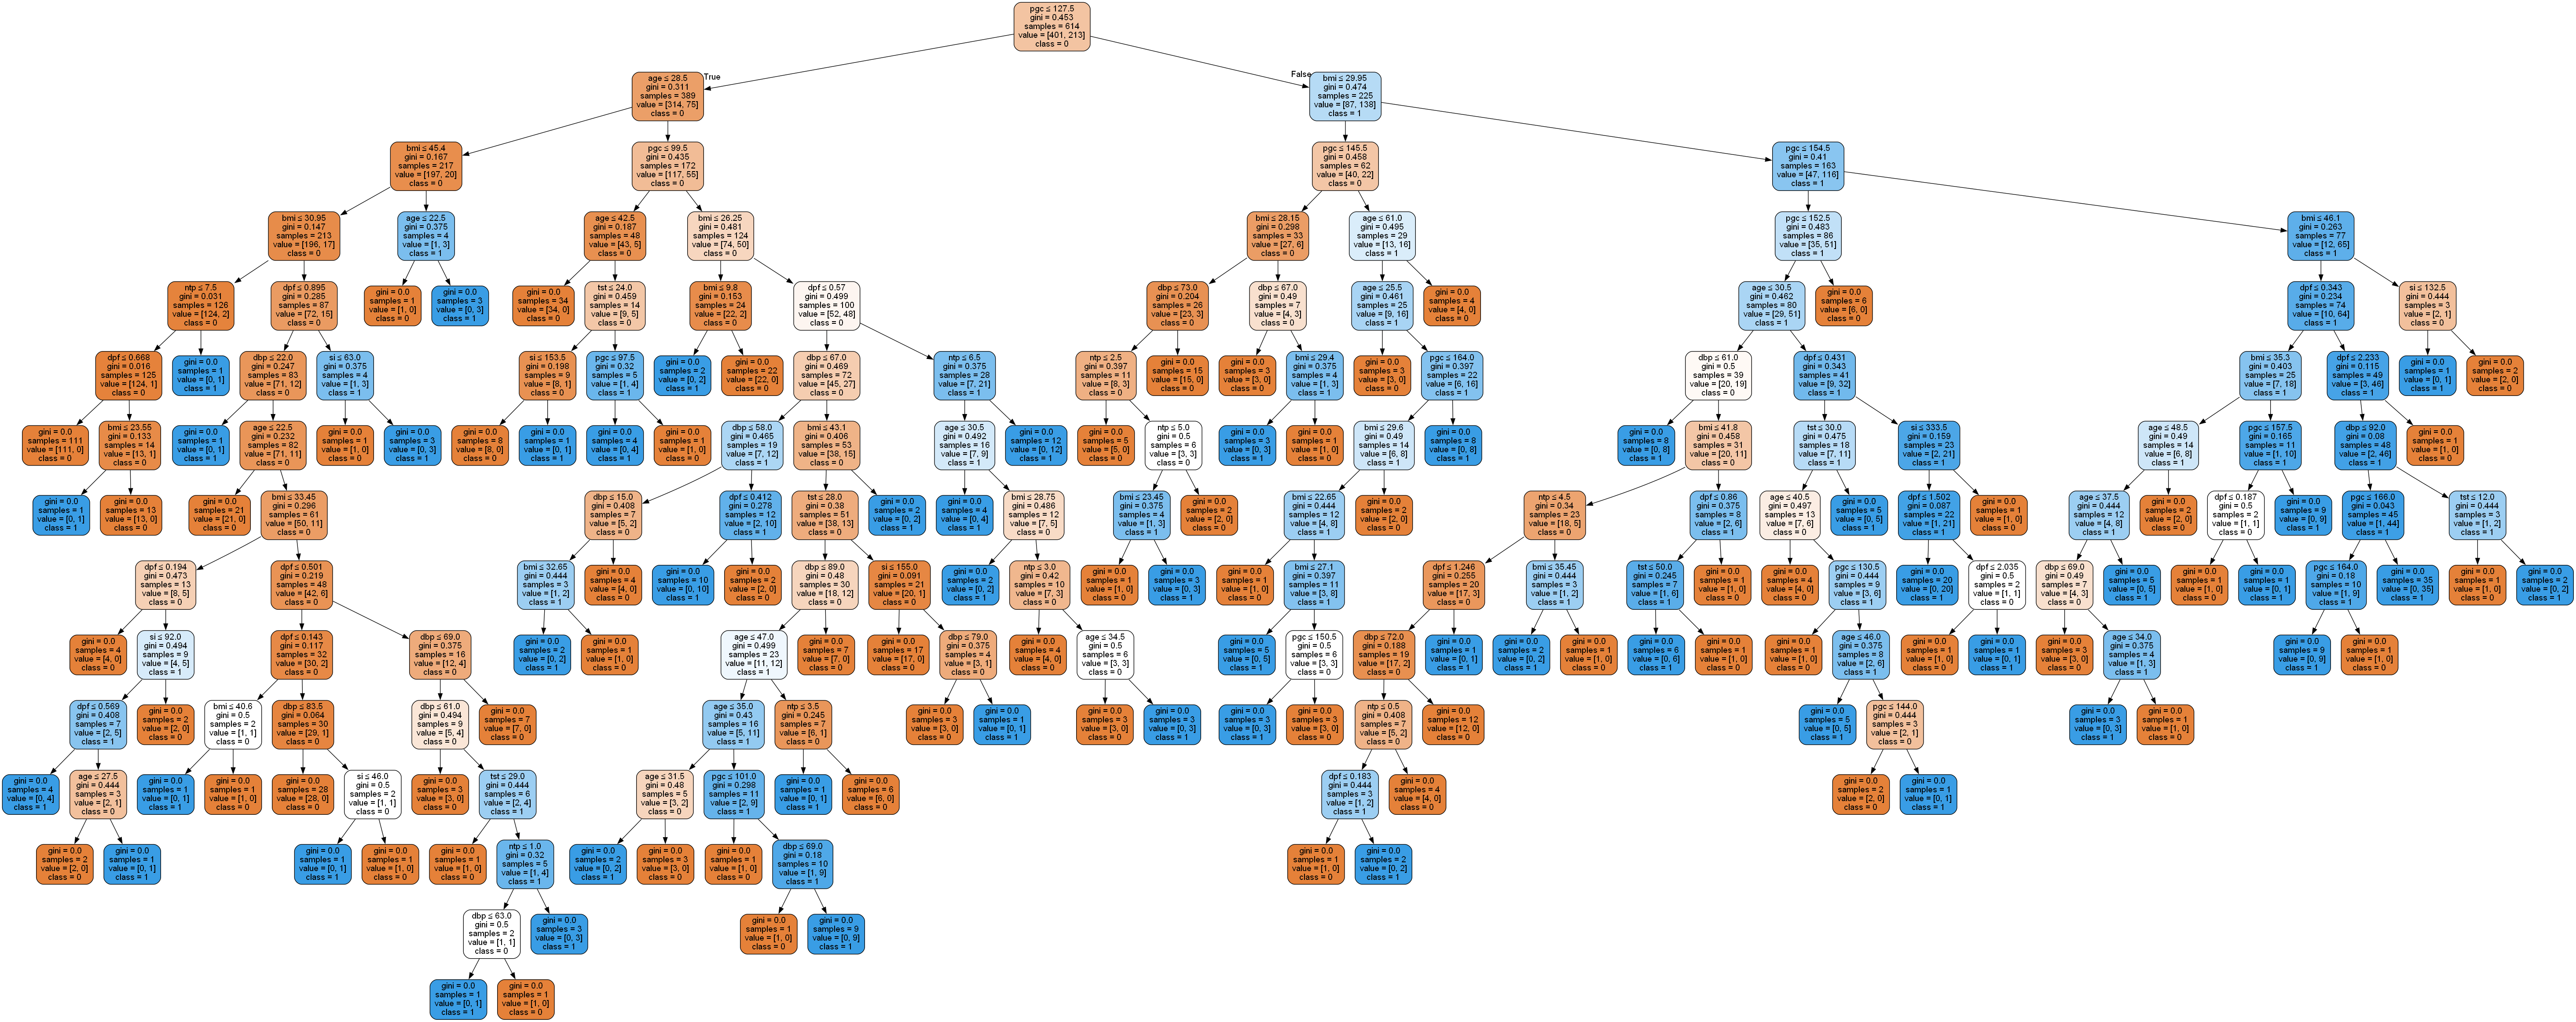

In [6]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())